<a href="https://colab.research.google.com/github/laseka/Pipo_2022/blob/main/Pipo_zadanie1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Symulacja gry w ruletkę z wykorzystaniem metody Monte Carlo**

In [125]:
import numpy as np
import math as m 
import matplotlib.pyplot as plt 
import random as rnd

### Funkcja symulująca wynik pojedynczego zakładu na ruletce

Zakładem jest losowe obstawienie jednego z 3 tuzinów: 1 - 12, 13 - 24, 25 - 36. Symulacja może być wykonana zarówno dla amerykańskiej, jak i europejskiej wersji ruletki.

In [137]:
def roulette_bet(bet_amount, wallet, variant):
  # variants:
  # 1 - american roulette
  # 2 - european roulette
  money_won = 0
  drawn_number = 0
  chosen_dozen = rnd.randint(1, 3)
  bet_won = False
  wallet -= bet_amount

  # check if we have enough money to place a bet
  if wallet < 0:
    wallet += bet_amount
    return wallet

  if variant == 1:
    drawn_number = rnd.randint(1, 38) # 37 represents 0, 38 represents 00
  else:
    drawn_number = rnd.randint(1, 37) # 37 represents 0

  if ( ((drawn_number <= 12) and (chosen_dozen == 1)) or 
      ((13 <= drawn_number <= 24) and (chosen_dozen == 2)) or 
      ((25 <= drawn_number <= 36) and (chosen_dozen == 3)) ):
    bet_won = True

  if bet_won:
    money_won = bet_amount*3

  wallet += money_won
  # print("Drawn number:", drawn_number)
  # print("Chosen dozen:", chosen_dozen)
  # print("Money won:", money_won)

  return wallet


# print(roulette_bet(20, 100, 1))
# print(roulette_bet(20, 10, 1))


### Funkcja tworząca symulację przy wykorzystaniu metody Monte Carlo

Funkcja zwraca tablicę średnich końcowych sald, uzyskanych dla określonej liczby iteracji.

In [138]:
def monte_carlo_roulette(how_many_spins, bets, wallet, iterations, roulette_variant):
  # final_result = wallet
  sum_result = np.zeros(how_many_spins)
  avg_result = np.zeros(how_many_spins)

  for i in range(iterations):
    current_wallet = wallet
    for spin in range(how_many_spins):
      bet = bets[rnd.randint(1, len(bets)) - 1]
      current_wallet = roulette_bet(bet, current_wallet, roulette_variant)
      sum_result[spin] += current_wallet
      avg_result[spin] = sum_result[spin]/(i+1)

  avg_result = avg_result.astype(int)
  # print(avg_result)
  return avg_result


In [139]:
# monte carlo roulette simulation
number_of_iterations = 1000
number_of_spins = 100
player_wallet = 20000
all_possible_bets = [10, 50, 100, 1000]
possible_bets1 = [10]
possible_bets2 = [50]
possible_bets3 = [100]
possible_bets4 = [1000]
variant = 1

x = np.arange(1, number_of_spins + 1)

# test
# monte_carlo_roulette(10, bet_variant1, player_wallet, 1, 1)
# monte_carlo_roulette(10, all_possible_bets, player_wallet, 1, 1)


In [141]:
# simulations for american roulette
y1_am = monte_carlo_roulette(number_of_spins, possible_bets1, player_wallet, number_of_iterations, variant)
y2_am = monte_carlo_roulette(number_of_spins, possible_bets2, player_wallet, number_of_iterations, variant)
y3_am = monte_carlo_roulette(number_of_spins, possible_bets3, player_wallet, number_of_iterations, variant)
y4_am = monte_carlo_roulette(number_of_spins, possible_bets4, player_wallet, number_of_iterations, variant)
y5_am = monte_carlo_roulette(number_of_spins, all_possible_bets, player_wallet, number_of_iterations, variant)


In [142]:
# simulations for european roulette
variant = 2
y1_eu = monte_carlo_roulette(number_of_spins, possible_bets1, player_wallet, number_of_iterations, variant)
y2_eu = monte_carlo_roulette(number_of_spins, possible_bets2, player_wallet, number_of_iterations, variant)
y3_eu = monte_carlo_roulette(number_of_spins, possible_bets3, player_wallet, number_of_iterations, variant)
y4_eu = monte_carlo_roulette(number_of_spins, possible_bets4, player_wallet, number_of_iterations, variant)
y5_eu = monte_carlo_roulette(number_of_spins, all_possible_bets, player_wallet, number_of_iterations, variant)


## **Wykresy zależności średniego końcowego salda od ilości losowań, dla różnych wielkości zakładów**

Wykresy zostały wykonane dla 1000 iteracji metody Monte Carlo oraz 100 losowań. Przyjęto 5 wariantów zakładów: stałe zakłady o wysokości odpowiednio 10, 50, 100 lub 1000 zł (ta sama wielkość zakładu dla każdego ze 100 losowań) oraz wariant losowo wybieranej wielkości zakładu spośród wymienionych.

Jak widać na wykresach - im większy zakład, tym większa strata. Co więcej, dla tak dużej liczby iteracji wykresy są prawie liniowo malejące. Końcowe średnie saldo niemalże od razu schodzi poniżej początkowych 20 000zł i właściwie cały czas maleje.

Text(0, 0.5, 'Average balance')

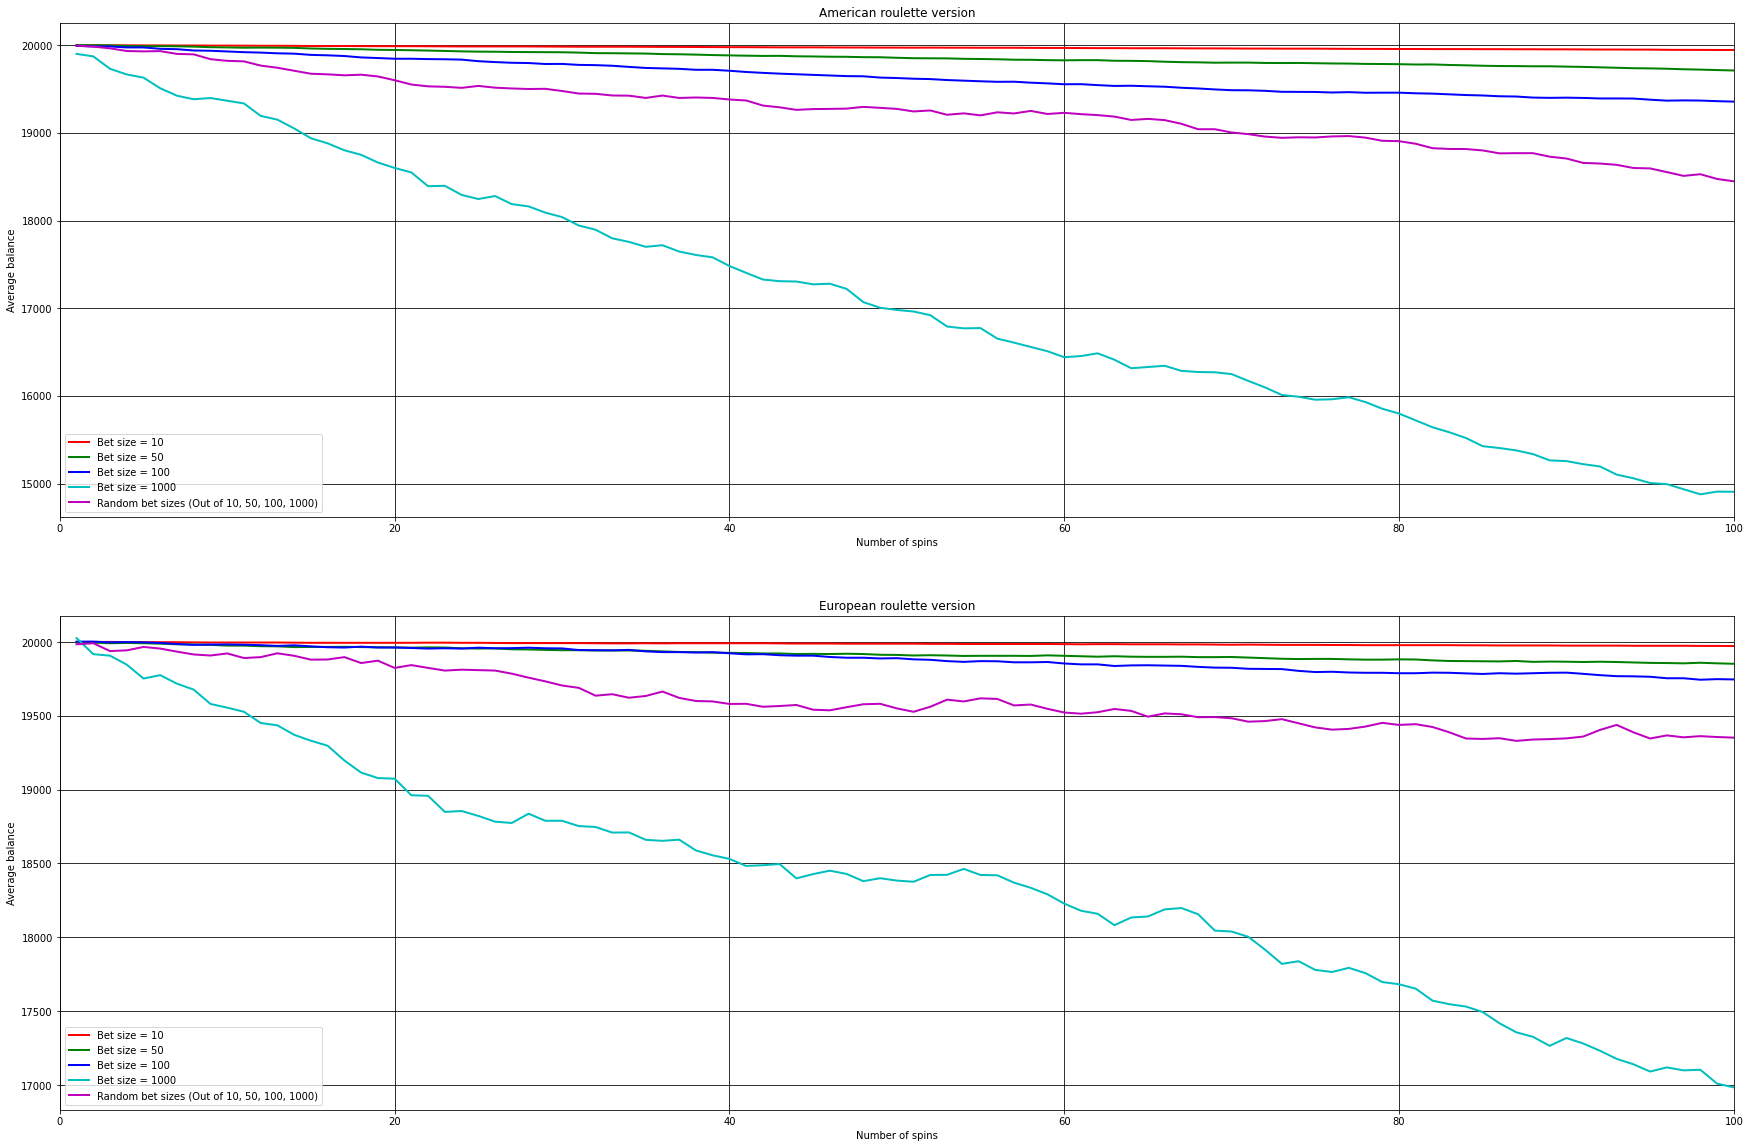

In [143]:
fig, ax = plt.subplots(2, 1)
# plt.rcParams["figure.figsize"] = (30, 20)

ax[0].set_title('American roulette version')
ax[0].plot(x, y1_am, label='Bet size = 10', color='r', linewidth=2)
ax[0].plot(x, y2_am, label='Bet size = 50', color='g', linewidth=2)
ax[0].plot(x, y3_am, label='Bet size = 100', color='b', linewidth=2)
ax[0].plot(x, y4_am, label='Bet size = 1000', color='c', linewidth=2)
ax[0].plot(x, y5_am, label='Random bet sizes (Out of 10, 50, 100, 1000)', color='m', linewidth=2)
ax[0].legend()
ax[0].grid(color='k', linestyle='-')
ax[0].set_xlim(0, number_of_spins)

ax[1].set_title('European roulette version')
ax[1].plot(x, y1_eu, label='Bet size = 10', color='r', linewidth=2)
ax[1].plot(x, y2_eu, label='Bet size = 50', color='g', linewidth=2)
ax[1].plot(x, y3_eu, label='Bet size = 100', color='b', linewidth=2)
ax[1].plot(x, y4_eu, label='Bet size = 1000', color='c', linewidth=2)
ax[1].plot(x, y5_eu, label='Random bet sizes (Out of 10, 50, 100, 1000)', color='m', linewidth=2)
ax[1].legend()
ax[1].grid(color='k', linestyle='-')
ax[1].set_xlim(0, number_of_spins)

ax[0].set_xlabel('Number of spins')
ax[0].set_ylabel('Average balance')
ax[1].set_xlabel('Number of spins')
ax[1].set_ylabel('Average balance')


In [144]:
variant = 1
y_iter_am1 = monte_carlo_roulette(number_of_spins, all_possible_bets, player_wallet, 10, variant)
y_iter_am2 = monte_carlo_roulette(number_of_spins, all_possible_bets, player_wallet, 50, variant)
y_iter_am3 = monte_carlo_roulette(number_of_spins, all_possible_bets, player_wallet, 100, variant)
y_iter_am4 = monte_carlo_roulette(number_of_spins, all_possible_bets, player_wallet, 500, variant)
y_iter_am5 = monte_carlo_roulette(number_of_spins, all_possible_bets, player_wallet, 1000, variant)

variant = 2
y_iter_eu1 = monte_carlo_roulette(number_of_spins, all_possible_bets, player_wallet, 10, variant)
y_iter_eu2 = monte_carlo_roulette(number_of_spins, all_possible_bets, player_wallet, 50, variant)
y_iter_eu3 = monte_carlo_roulette(number_of_spins, all_possible_bets, player_wallet, 100, variant)
y_iter_eu4 = monte_carlo_roulette(number_of_spins, all_possible_bets, player_wallet, 500, variant)
y_iter_eu5 = monte_carlo_roulette(number_of_spins, all_possible_bets, player_wallet, 1000, variant)


## **Wykresy zależności średniego końcowego salda od ilości losowań, dla różnej liczby iteracji metody Monte Carlo**

Wykresy przedstawiają zależność odpowiednio dla 10, 50, 100, 500 oraz 1000 iteracji metody Monte Carlo. Wyniki te otrzymano dla losowych wartości zakładów (10, 50, 100 lub 1000 zł) oraz dla 100 losowań.

Warto zauważyć, że im mniej iteracji, tym większa wariancja wykresu. Wartości wykresów dla 10 iteracji zmieniają się najbardziej gwałtownie, a zarazem prezentują najlepsze uzyskane dla losowań saldo. Na tej podstawie można wywnioskować, że największe szanse na wygraną (na osiągnięcie zysku z gry) mamy przy jak najmniejszej liczbie gier.

Text(0, 0.5, 'Average balance')

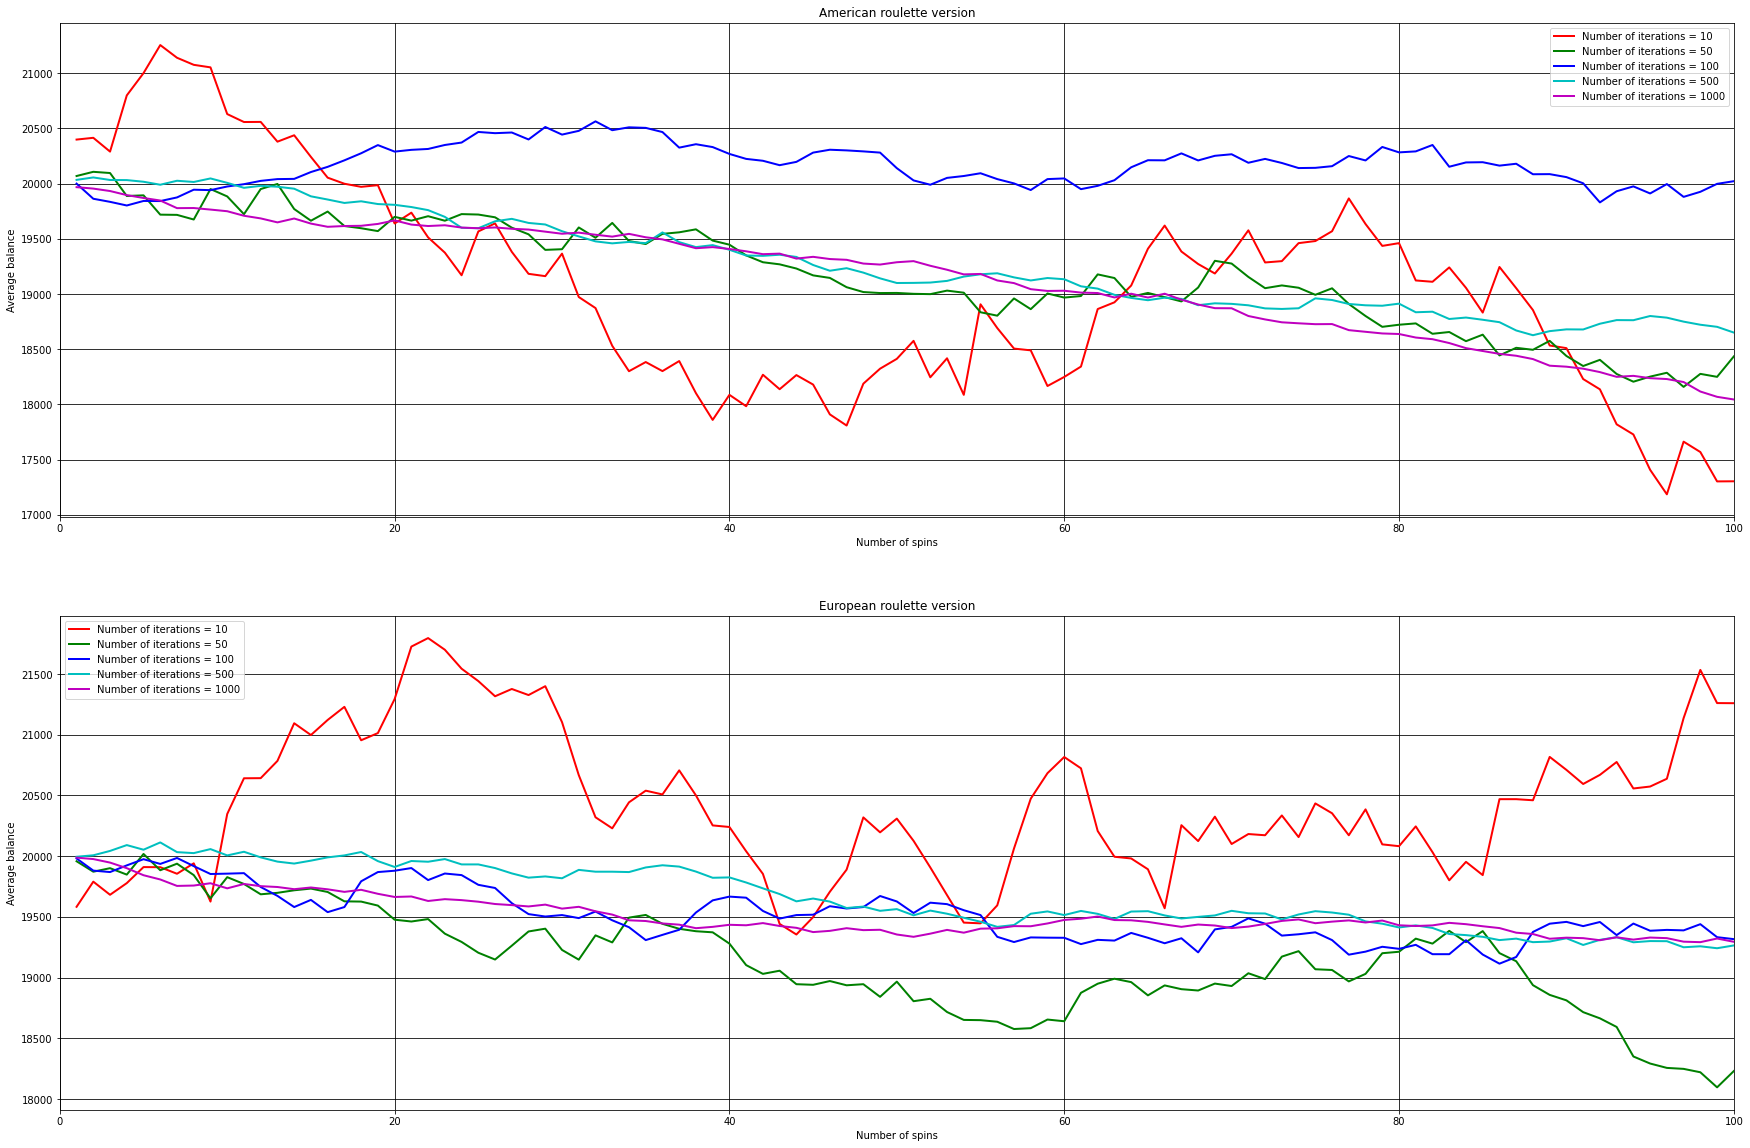

In [145]:
# x_iter = np.arange(1, number_of_spins + 1)

fig, ax = plt.subplots(2, 1)
# plt.rcParams["figure.figsize"] = (30, 20)

# Plot for random bets and different number of iterations
ax[0].set_title('American roulette version')
ax[0].plot(x, y_iter_am1, label='Number of iterations = 10', color='r', linewidth=2)
ax[0].plot(x, y_iter_am2, label='Number of iterations = 50', color='g', linewidth=2)
ax[0].plot(x, y_iter_am3, label='Number of iterations = 100', color='b', linewidth=2)
ax[0].plot(x, y_iter_am4, label='Number of iterations = 500', color='c', linewidth=2)
ax[0].plot(x, y_iter_am5, label='Number of iterations = 1000', color='m', linewidth=2)
ax[0].legend()
ax[0].grid(color='k', linestyle='-')
ax[0].set_xlim(0, number_of_spins)

ax[1].set_title('European roulette version')
ax[1].plot(x, y_iter_eu1, label='Number of iterations = 10', color='r', linewidth=2)
ax[1].plot(x, y_iter_eu2, label='Number of iterations = 50', color='g', linewidth=2)
ax[1].plot(x, y_iter_eu3, label='Number of iterations = 100', color='b', linewidth=2)
ax[1].plot(x, y_iter_eu4, label='Number of iterations = 500', color='c', linewidth=2)
ax[1].plot(x, y_iter_eu5, label='Number of iterations = 1000', color='m', linewidth=2)
ax[1].legend()
ax[1].grid(color='k', linestyle='-')
ax[1].set_xlim(0, number_of_spins)

ax[0].set_xlabel('Number of spins')
ax[0].set_ylabel('Average balance')
ax[1].set_xlabel('Number of spins')
ax[1].set_ylabel('Average balance')

In [180]:
def win_probability(bet, wallet, v, spins):
  bets_won = 0
  current_wallet = wallet

  for s in range(spins):
    result = roulette_bet(bet, current_wallet, v)
    if result > current_wallet:
      bets_won += 1
    current_wallet = result

  probability = bets_won/spins

  return probability

## **Prawdopodobieństwo na wygraną w zależności od wariantu ruletki i liczby gier**

Prawdopodobieństwo wygranej (stosunek wygranych do całkowitej liczby gier) maleje wraz ze wzrostem liczby gier. Można również zauważyć, że jest ono większe dla europejskiej wersji ruletki niż dla amerykańskiej (w amerykańskiej wersji liczba przegrywających pól jest większa ze względu na pole '00').

In [221]:
# Chances of winning for european version
winning_prob_eu1 = win_probability(20, 2000, 2, 100)
winning_prob_eu2 = win_probability(20, 2000, 2, 1000)
winning_prob_eu3 = win_probability(20, 2000, 2, 10000)
print("Probability of winning a bet in european roulette: ")
print("In 100 games: ", winning_prob_eu1)
print("In 1000 games: ", winning_prob_eu2)
print("In 10000 games: ", winning_prob_eu3)

# Chances of winning for american version
winning_prob_am1 = win_probability(20, 2000, 1, 100)
winning_prob_am2 = win_probability(20, 2000, 1, 1000)
winning_prob_am3 = win_probability(20, 2000, 1, 10000)
print("Probability of winning a bet in american roulette: ")
print("In 100 games: ", winning_prob_am1)
print("In 1000 games: ", winning_prob_am2)
print("In 10000 games: ", winning_prob_am3)


Probability of winning a bet in european roulette: 
In 100 games:  0.33
In 1000 games:  0.322
In 10000 games:  0.1945
Probability of winning a bet in american roulette: 
In 100 games:  0.26
In 1000 games:  0.146
In 10000 games:  0.0461
